In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [2]:
def ReflfileName(num):
    if num // 100 != 0:
        return "an03r0" + str(num) + ".txt"
    if num // 10 != 0:
        return "an03r00" + str(num) + ".txt"
    return "an03r000" + str(num) + ".txt"

In [4]:
filename = "D:\\_cprs_data\\_4\\"
data = xlrd.open_workbook(filename + "LDB_angers2003.xls")
table = data.sheets()[1]
title = table.row_values(0)
indexName = ["C_a", "C_b", "C_ab", "C_car", "EWT", "LMA"]
index = np.zeros(len(indexName))
for i in range(len(title)):
    for j in range(len(indexName)):
        if title[i] == indexName[j]:
            index[j] = i
nrows = table.nrows - 1
Ca = np.zeros(nrows)
Cb = np.zeros(nrows)
Cab = np.zeros(nrows)
Ccar = np.zeros(nrows)
EWT = np.zeros(nrows)
LMA = np.zeros(nrows)
for i in range(nrows):
    Ca[i] = table.cell_value(i + 1, index[0].astype(np.int32))
    Cb[i] = table.cell_value(i + 1, index[1].astype(np.int32))
    Cab[i] = table.cell_value(i + 1, index[2].astype(np.int32))
    Ccar[i] = table.cell_value(i + 1, index[3].astype(np.int32))
    EWT[i] = table.cell_value(i + 1, index[4].astype(np.int32))
    LMA[i] = table.cell_value(i + 1, index[5].astype(np.int32))
psize = np.loadtxt(filename + ReflfileName(1)).shape[0]
dsize = nrows
dataset = np.zeros([dsize, psize])
for i in range(dsize):
    dataset[i] = np.loadtxt(filename + ReflfileName(i + 1)).T[1]
pca = PCA(n_components = 3)
pcad = pca.fit_transform(dataset)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(pcad, Ca, test_size = 0.3, random_state = 0)
model = MLPRegressor(hidden_layer_sizes = (1000,), activation = 'logistic', shuffle = False, max_iter = 2000, random_state = 42, early_stopping = True, learning_rate_init = 0.08)
model.fit(X_train, y_train)
pre = model.predict(X_test)
np.sqrt(((y_test - pre) ** 2).mean())

4.86531798236941

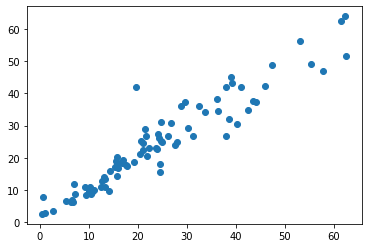

In [62]:
plt.scatter(y_test, pre)

In [164]:
y_train.shape

(193,)